<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Stock_Price_Prediction_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Load our Data
import yfinance as yf

data = yf.download(["MSFT", "AAPL"], period="max")

/tmp/ipython-input-2256827353.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(["MSFT", "AAPL"], period="max")
[*********************100%***********************]  2 of 2 completed


In [ ]:
df = data
df.head()

Price          Close           High            Low           Open       \
Ticker          AAPL MSFT      AAPL MSFT      AAPL MSFT      AAPL MSFT   
Date                                                                     
1980-12-12  0.098485  NaN  0.098913  NaN  0.098485  NaN  0.098485  NaN   
1980-12-15  0.093347  NaN  0.093775  NaN  0.093347  NaN  0.093775  NaN   
1980-12-16  0.086495  NaN  0.086924  NaN  0.086495  NaN  0.086924  NaN   
1980-12-17  0.088636  NaN  0.089064  NaN  0.088636  NaN  0.088636  NaN   
1980-12-18  0.091206  NaN  0.091634  NaN  0.091206  NaN  0.091206  NaN   

Price          Volume       
Ticker           AAPL MSFT  
Date                        
1980-12-12  469033600  NaN  
1980-12-15  175884800  NaN  
1980-12-16  105728000  NaN  
1980-12-17   86441600  NaN  
1980-12-18   73449600  NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11276 entries, 1980-12-12 to 2025-09-09
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11276 non-null  float64
 1   (Close, MSFT)   9950 non-null   float64
 2   (High, AAPL)    11276 non-null  float64
 3   (High, MSFT)    9950 non-null   float64
 4   (Low, AAPL)     11276 non-null  float64
 5   (Low, MSFT)     9950 non-null   float64
 6   (Open, AAPL)    11276 non-null  float64
 7   (Open, MSFT)    9950 non-null   float64
 8   (Volume, AAPL)  11276 non-null  int64  
 9   (Volume, MSFT)  9950 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 969.0 KB


In [ ]:
#Drop Missing Values
df = df.dropna()

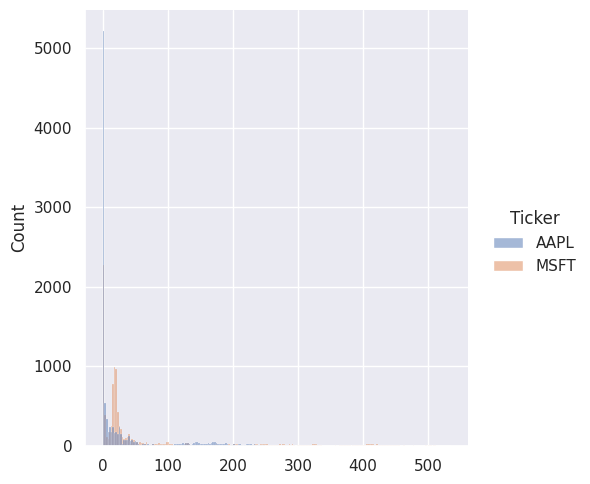

In [ ]:
#Exploratory Data Analysis
sns.set()
sns.displot(df["Close"])
plt.show()

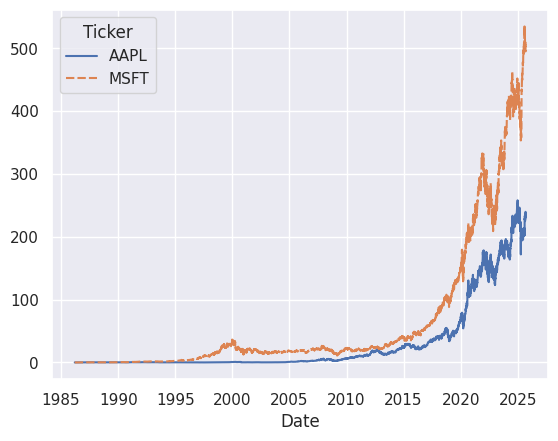

In [ ]:
#Plot the Close over the years
sns.lineplot(df["Close"])
plt.show()

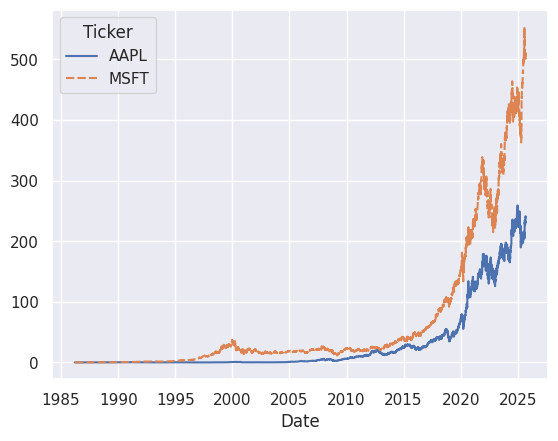

In [ ]:
sns.lineplot(df["High"])
plt.show()

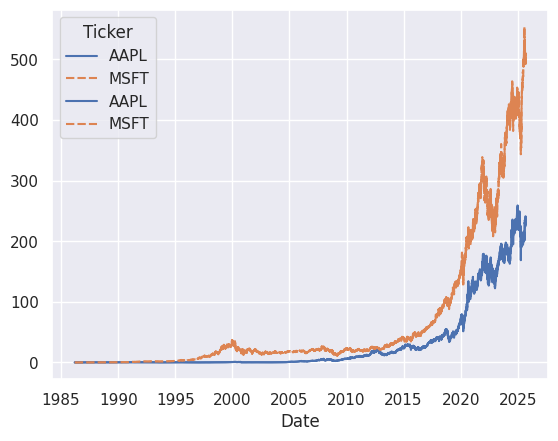

In [ ]:
sns.lineplot(df["Low"], color="red")
sns.lineplot(df["High"], color="green")
plt.show()

In [ ]:
#Separate our Data
X = df.drop("Close", axis=1)
Y = df["Close"]

In [ ]:
X

Price             High                     Low                    Open  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1986-03-13    0.085639    0.062156    0.083498    0.054188    0.084783   
1986-03-14    0.089921    0.062688    0.084783    0.059500    0.084783   
1986-03-17    0.089064    0.063219    0.086924    0.061625    0.089064   
1986-03-18    0.093347    0.063219    0.088636    0.060562    0.089064   
1986-03-19    0.093347    0.061625    0.090350    0.059500    0.092062   
...                ...         ...         ...         ...         ...   
2025-09-03  238.850006  507.790009  234.360001  502.320007  237.210007   
2025-09-04  239.899994  508.149994  236.740005  503.149994  238.449997   
2025-09-05  241.320007  511.970001  238.490005  492.369995  240.000000   
2025-09-08  240.149994  501.200012  236.339996  495.029999  239.300003   
2025-09-09  238.780502  502.250000  233.369995  497.709991  237.000000   

Price                      Volume                
Ticker            MSFT       AAPL          MSFT  
Date                                             
1986-03-13    0.054188  115964800  1.031789e+09  
1986-03-14    0.059500  384854400  3.081600e+08  
1986-03-17    0.061625  118720000  1.331712e+08  
1986-03-18    0.062688  249356800  6.776640e+07  
1986-03-19    0.061093  189884800  4.789440e+07  
...                ...        ...           ...  
2025-09-03  503.790009   66427800  1.634510e+07  
2025-09-04  504.299988   47549400  1.550950e+07  
2025-09-05  509.070007   54870400  3.199480e+07  
2025-09-08  498.109985   48999500  1.677100e+07  
2025-09-09  501.390015   65167049  1.421475e+07  

[9950 rows x 8 columns]

In [ ]:
#Standard Scaling
scaler = StandardScaler()
X2 = scaler.fit_transform(X)

In [ ]:
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.15, random_state=2
)

In [ ]:
#Create Model Function
def model_function(model):
    model.fit(X_train, y_train)

    #Prediction
    pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    train_score = r2_score(y_train, train_pred)
    score = r2_score(y_test, pred)
    error = mean_squared_error(y_test, pred)

    print("Train Score: ", train_score)
    print("Score: ", score)
    print("Error: ", error)

In [ ]:
linear = LinearRegression()
model_function(linear)

Train Score:  0.9999573046939658
Score:  0.9999529322850691
Error:  0.2881443198458381


In [ ]:
tree = DecisionTreeRegressor()
model_function(tree)

Train Score:  1.0
Score:  0.9996594124825737
Error:  1.8826121864436434


In [ ]:
#We Will Pick the DecisionTreeRegressor

In [ ]:
joblib.dump(tree, "stock_price_chatgpt.joblib")

['stock_price_chatgpt.joblib']